<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/five_thirty_eight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Styles: FiveThirtyEight Case Study

## 0. Preparation of the environment
Import of libraries and the dataset from MyDrive.

In [27]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.style as style

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datasets = Path('/content/drive/MyDrive/Colab Notebooks/Datasets')

Mounted at /content/drive


In [6]:
white = 'winequality-white.csv'
red = 'winequality-red.csv'
white_wine_raw = pd.read_csv(Path.joinpath(datasets, white), sep=';')
white_wine = white_wine_raw.copy()
red_wine_raw = pd.read_csv(Path.joinpath(datasets, red), sep=';')
red_wine = red_wine_raw.copy()

## 1. Drawing a bar chart

In [25]:
red_corr = red_wine.corr()['quality'].iloc[:-1]
white_corr = white_wine.corr()['quality'].iloc[:-1]
pd.concat([red_corr, white_corr], axis=1, keys=['red', 'white'])

,red,white
fixed acidity,0.124052,-0.113663
volatile acidity,-0.390558,-0.194723
citric acid,0.226373,-0.009209
residual sugar,0.013732,-0.097577
chlorides,-0.128907,-0.209934
free sulfur dioxide,-0.050656,0.008158
total sulfur dioxide,-0.185100,-0.174737
density,-0.174919,-0.307123
pH,-0.057731,0.099427
sulphates,0.251397,0.053678


In [62]:
positive_white = white_corr >= 0
color_map_white = positive_white.map({True:'#33A1C9', False:'#ffae42'})
positive_red = red_corr >= 0
color_map_red = positive_red.map({True:'#33A1C9', False:'#ffae42'})

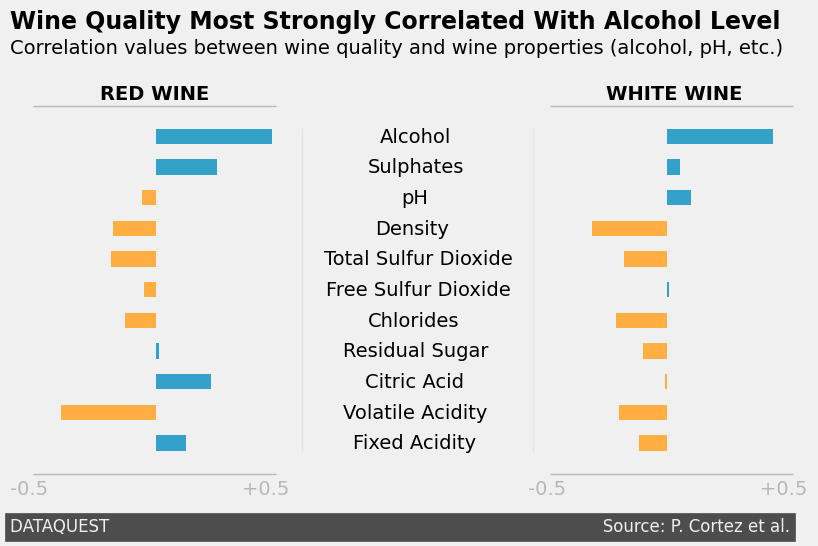

In [65]:

style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2, height=0.5, color=color_map_white)
ax.barh(red_corr.index, red_corr, left=-0.1, height=0.5,color=color_map_red)
ax.grid(visible=False)
ax.set_xticks([])
ax.set_yticks([])

x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8
for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1

ax.axvline(x=0.5, ymin=0.1, ymax=0.9, c='grey', alpha=0.1, linewidth=1)
ax.axvline(x=1.45, ymin=0.1, ymax=0.9, c='grey', alpha=0.1, linewidth=1)

ax.axhline(y=-1, color='grey', linewidth=1, alpha=0.5, xmin=0.01, xmax=0.32)
ax.axhline(y=-1, color='grey', linewidth=1, alpha=0.5, xmin=0.67, xmax=0.98)
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5', color='grey', alpha=0.5)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5', color='grey', alpha=0.5)

ax.axhline(y=11, color='grey', linewidth=1, alpha=0.5, xmin=0.01, xmax=0.32)
ax.axhline(y=11, color='grey', linewidth=1, alpha=0.5, xmin=0.67, xmax=0.98)
ax.text(x=-0.33, y=11.2, s='RED WINE', weight='bold')
ax.text(x=1.75, y=11.2, s='WHITE WINE', weight='bold')

ax.text(x=-0.7, y=-2.9, s='DATAQUEST' + ' '*94 + 'Source: P. Cortez et al.',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d', fontsize=12)
ax.text(x=-0.7, y=13.5, fontsize=17, weight='bold',
        s='Wine Quality Most Strongly Correlated With Alcohol Level')
ax.text(x=-0.7, y=12.7,
        s='Correlation values between wine quality and wine properties \
(alcohol, pH, etc.)')

plt.show()